In [7]:
from library.optimiser import *
from library.objective_function import *
from library.post_analysis import *
from library.experiments import *
import time
%matplotlib inline
SEED = 23191

In [20]:
def test_high_dimension_same_side(opt, num=1, length=10, hasSTD=False):
    max_dim = np.arange(10, 200, 10).shape[0]
    stats = {}
    points = []
    dims = np.arange(10, 200, 10)
    times = np.zeros((max_dim, ))
    costs = np.zeros((max_dim, ))
    evals = np.zeros((max_dim, ))

    for i, dim in enumerate(np.arange(10, 200, 10)):
        points_ = np.random.rand(dim, num) * length
        cost = np.zeros((num, ))
        eval_ = np.zeros((num, ))
        start = time.time()
        for j in range(num):
            opt.dim = dim
            if hasSTD:
                opt.std = np.ones((dim,)) * 3
            opt.x0 = points_[:,j]
            _ , cost[j], stats = opt.optimise(ackley(dim=dim))
            eval_[j] = stats['evals']
        end = time.time()
        s = end - start
        points.append(points_) 
        times[i] = s / num
        costs[i] = cost.mean()
        evals[i] = eval_.mean()
        print("dim: {}, time: {}, cost: {}, evals: {}".format(dim, times[i], costs[i], evals[i]))
    stats['time'] = times
    stats['evals'] = evals
    stats['cost'] = costs
    stats['dims'] = dims
    stats['start_points'] = points
    return stats

In [50]:
points_ = np.random.rand(10, 2) 
points_ / np.linalg.norm(points_, axis=0) * 10

array([[3.31678343, 3.47836163],
       [2.39505689, 0.15692776],
       [4.70081035, 2.63248033],
       [0.18689536, 2.92546869],
       [3.31226585, 3.89864799],
       [1.49603952, 3.64721841],
       [1.8317314 , 4.15819528],
       [4.67187247, 1.66075104],
       [4.68645712, 4.84206043],
       [0.88110748, 0.62623067]])

In [55]:
def test_high_dimension_same_norm(opt, num=1, length=10, hasSTD=False):
    max_dim = np.arange(10, 200, 10).shape[0]
    stats = {}
    points = []
    dims = np.arange(10, 200, 10)
    times = np.zeros((max_dim, ))
    costs = np.zeros((max_dim, ))
    evals = np.zeros((max_dim, ))

    for i, dim in enumerate(np.arange(10, 200, 10)):
        points_ = np.random.rand(dim, num) 
        normlised_points_ = points_ / np.linalg.norm(points_, axis=0) * length
        cost = np.zeros((num, ))
        eval_ = np.zeros((num, ))
        start = time.time()
        for j in range(num):
            opt.dim = dim
            if hasSTD:
                opt.std = np.ones((dim,)) * 3
            opt.x0 = normlised_points_[:,j]
            _ , cost[j], stats = opt.optimise(ackley(dim=dim))
            eval_[j] = stats['evals']
        end = time.time()
        s = end - start
        points.append(normlised_points_) 
        times[i] = s / num
        costs[i] = cost.mean()
        evals[i] = eval_.mean()
        print("dim: {}, time: {}, cost: {}, evals: {}".format(dim, times[i], costs[i], evals[i]))
    stats['time'] = times
    stats['evals'] = evals
    stats['cost'] = costs
    stats['dims'] = dims
    stats['start_points'] = points
    return stats

In [52]:
class post_analysis_highD:
    def __init__(self, stats):
        self.stats = stats
    def __plot(self, data, ylabel):
        fig = plt.figure(figsize=(10,6))
        ax = plt.subplot(111)
        ax.plot(self.stats['dims'], data)
        ax.set_xlabel("dimention")
        ax.set_ylabel(ylabel)
        return ax
        
    def plot_time_vs_dim(self):
        return self.__plot(self.stats['time'], "time(s)")
        
    def plot_evals_vs_dim(self):
        return self.__plot(self.stats['evals'], "evals")
        
    def plot_cost_vs_dim(self):
        return self.__plot(self.stats['cost'], "cost")
        

## no optimisation

In [49]:
dn = do_nothing()
stats_no = test_high_dimension_same_side(dn, 10)
ana_no = post_analysis_highD(stats_no)

dim: 10, time: 4.088878631591797e-05, cost: 14.981375493234031, evals: 1.0
dim: 20, time: 3.802776336669922e-05, cost: 15.19179040190373, evals: 1.0
dim: 30, time: 5.8603286743164065e-05, cost: 14.943743241207667, evals: 1.0
dim: 40, time: 0.00012230873107910156, cost: 15.206928697155575, evals: 1.0
dim: 50, time: 6.551742553710938e-05, cost: 15.643565665211815, evals: 1.0
dim: 60, time: 7.741451263427734e-05, cost: 15.279335975636275, evals: 1.0
dim: 70, time: 4.839897155761719e-05, cost: 15.416896823965459, evals: 1.0
dim: 80, time: 3.371238708496094e-05, cost: 15.459230050963885, evals: 1.0
dim: 90, time: 3.788471221923828e-05, cost: 15.27826149624172, evals: 1.0
dim: 100, time: 3.230571746826172e-05, cost: 15.396747113055957, evals: 1.0
dim: 110, time: 3.3402442932128905e-05, cost: 15.283596635178089, evals: 1.0
dim: 120, time: 3.311634063720703e-05, cost: 15.462426205913937, evals: 1.0
dim: 130, time: 4.3892860412597655e-05, cost: 15.4836837296547, evals: 1.0
dim: 140, time: 4.091

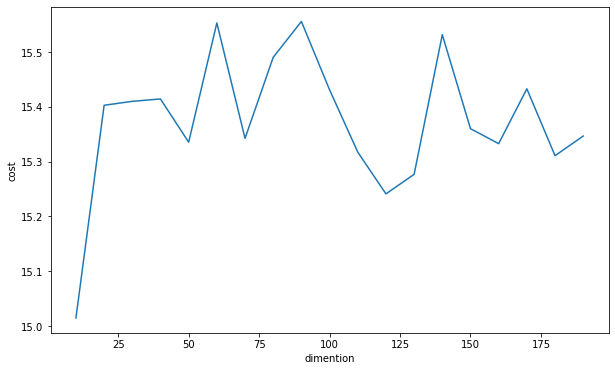

In [30]:
ana_no.plot_cost_vs_dim()

## keep same distance to origin

In [56]:
dn = do_nothing()
stats_no_norm = test_high_dimension_same_norm(dn, 1)
ana_no_norm = post_analysis_highD(stats_no_norm)

dim: 10, time: 8.082389831542969e-05, cost: 10.929263325209616, evals: 1.0
dim: 20, time: 4.887580871582031e-05, cost: 8.932970465394483, evals: 1.0
dim: 30, time: 4.124641418457031e-05, cost: 7.932929041241028, evals: 1.0
dim: 40, time: 3.910064697265625e-05, cost: 7.157716281819422, evals: 1.0
dim: 50, time: 3.695487976074219e-05, cost: 6.668248115582276, evals: 1.0
dim: 60, time: 3.886222839355469e-05, cost: 6.122747906889412, evals: 1.0
dim: 70, time: 3.910064697265625e-05, cost: 5.851477508031888, evals: 1.0
dim: 80, time: 3.886222839355469e-05, cost: 5.719038506894314, evals: 1.0
dim: 90, time: 3.886222839355469e-05, cost: 5.506300577546288, evals: 1.0
dim: 100, time: 4.00543212890625e-05, cost: 5.414410458698885, evals: 1.0
dim: 110, time: 4.100799560546875e-05, cost: 5.2250263573143165, evals: 1.0
dim: 120, time: 4.792213439941406e-05, cost: 5.073933964793806, evals: 1.0
dim: 130, time: 5.2928924560546875e-05, cost: 4.81027971399201, evals: 1.0
dim: 140, time: 5.197525024414062

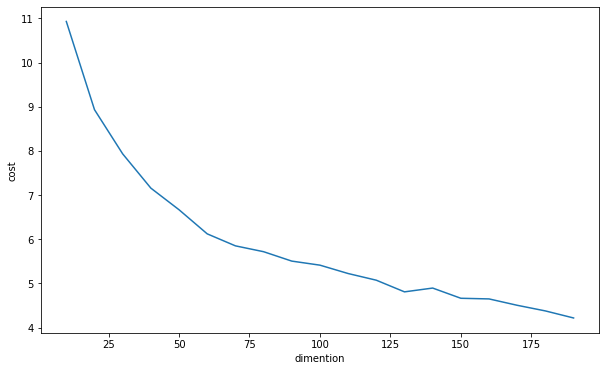

In [57]:
ana_no_norm.plot_cost_vs_dim()

## round off (total local minimizer)

In [33]:
ro = round_off()
stats_ro = test_high_dimension_same_side(ro, 10)
ana_ro = post_analysis_highD(stats_ro)

dim: 10, time: 0.00019299983978271484, cost: 15.296541701754233, evals: 1.0
dim: 20, time: 7.090568542480468e-05, cost: 15.396944064010318, evals: 1.0
dim: 30, time: 7.991790771484375e-05, cost: 15.443306082597825, evals: 1.0
dim: 40, time: 0.00011630058288574219, cost: 15.15317776803127, evals: 1.0
dim: 50, time: 7.529258728027344e-05, cost: 15.382349899009544, evals: 1.0
dim: 60, time: 6.0105323791503905e-05, cost: 15.621576085956107, evals: 1.0
dim: 70, time: 3.917217254638672e-05, cost: 15.268847251287843, evals: 1.0
dim: 80, time: 3.697872161865234e-05, cost: 15.435183743414433, evals: 1.0
dim: 90, time: 3.6096572875976564e-05, cost: 15.442197558689486, evals: 1.0
dim: 100, time: 3.871917724609375e-05, cost: 15.486937604525775, evals: 1.0
dim: 110, time: 3.557205200195312e-05, cost: 15.521369998460425, evals: 1.0
dim: 120, time: 3.5881996154785156e-05, cost: 15.484663456730669, evals: 1.0
dim: 130, time: 7.410049438476563e-05, cost: 15.370349353849841, evals: 1.0
dim: 140, time: 4

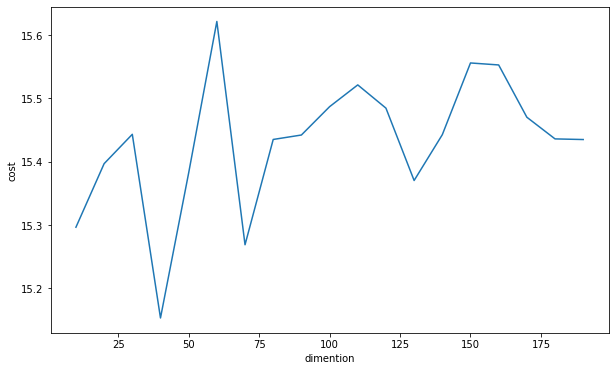

In [34]:
ana_ro.plot_cost_vs_dim()

## keep same distance to origin

In [60]:
ro = round_off()
stats_ro = test_high_dimension_same_norm(ro, 10)
ana_ro_norm = post_analysis_highD(stats_ro)

dim: 10, time: 4.8494338989257814e-05, cost: 11.077982166872301, evals: 1.0
dim: 20, time: 5.2309036254882814e-05, cost: 8.918833883172722, evals: 1.0
dim: 30, time: 3.5595893859863284e-05, cost: 7.827969755796355, evals: 1.0
dim: 40, time: 4.3511390686035156e-05, cost: 7.148154686272266, evals: 1.0
dim: 50, time: 8.928775787353516e-05, cost: 6.6209275929060425, evals: 1.0
dim: 60, time: 8.702278137207031e-05, cost: 6.2177033236936445, evals: 1.0
dim: 70, time: 7.560253143310547e-05, cost: 5.9276087560142035, evals: 1.0
dim: 80, time: 6.968975067138672e-05, cost: 5.732997415753722, evals: 1.0
dim: 90, time: 7.250308990478516e-05, cost: 5.55535241098955, evals: 1.0
dim: 100, time: 3.4880638122558596e-05, cost: 5.373990422996867, evals: 1.0
dim: 110, time: 4.138946533203125e-05, cost: 5.255506796851939, evals: 1.0
dim: 120, time: 3.5595893859863284e-05, cost: 5.089684000546791, evals: 1.0
dim: 130, time: 7.359981536865234e-05, cost: 4.91704243153268, evals: 1.0
dim: 140, time: 4.65869903

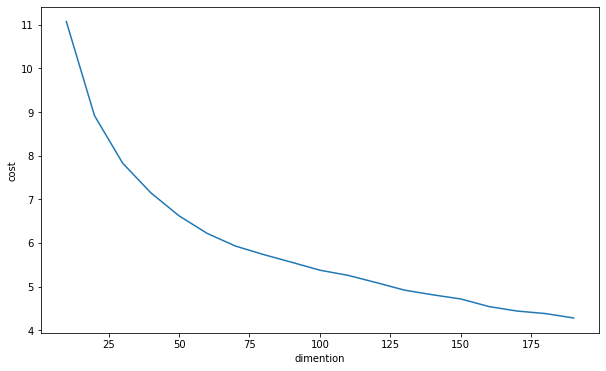

In [62]:
ana_ro_norm.plot_cost_vs_dim()

## Adam

In [44]:
ad = adam()
stats_adam = test_high_dimension_same_side(ad, 10)

dim: 10, time: 0.007065200805664062, cost: 13.782409189905357, evals: 91.2
dim: 20, time: 0.007364988327026367, cost: 13.461503238567172, evals: 102.0
dim: 30, time: 0.00724029541015625, cost: 13.939608225588566, evals: 104.3
dim: 40, time: 0.007227110862731934, cost: 13.50811283205542, evals: 107.3
dim: 50, time: 0.007432985305786133, cost: 13.940682883948483, evals: 109.2
dim: 60, time: 0.008179688453674316, cost: 13.629338225886164, evals: 111.0
dim: 70, time: 0.007596302032470703, cost: 13.347188964994066, evals: 111.5
dim: 80, time: 0.0080902099609375, cost: 13.644159414173302, evals: 113.5
dim: 90, time: 0.009586405754089356, cost: 13.699654900593753, evals: 114.9
dim: 100, time: 0.008155417442321778, cost: 13.517839723295534, evals: 115.5
dim: 110, time: 0.00929570198059082, cost: 13.640001296958634, evals: 116.3
dim: 120, time: 0.008472275733947755, cost: 13.708450443861489, evals: 117.7
dim: 130, time: 0.009821271896362305, cost: 13.630540541886376, evals: 119.1
dim: 140, time

In [45]:
ana_adam = post_analysis_highD(stats_adam)

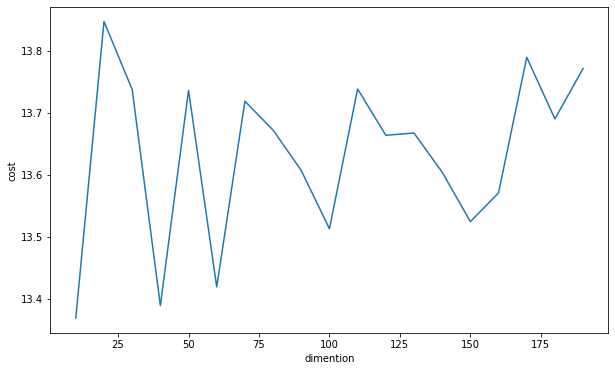

In [38]:
ana_adam.plot_cost_vs_dim()

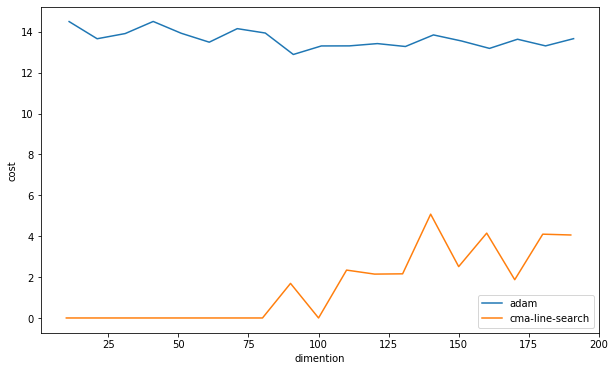

In [21]:
ax = ana_adam.plot_cost_vs_dim()
ax.plot(stats_ad['dims'], stats_ad['cost'])
plt.legend(["adam", "cma-line-search"])

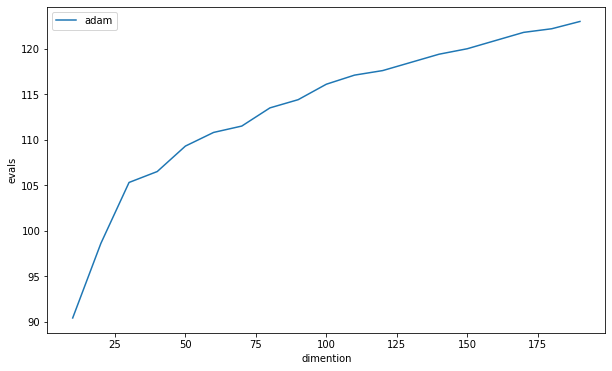

In [42]:
ana_adam.plot_evals_vs_dim()
plt.legend(["adam"])

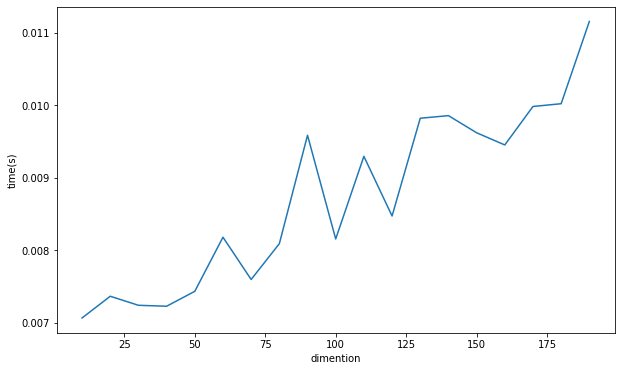

In [46]:
ana_adam.plot_time_vs_dim()

## keep same distance to origin

In [104]:
ad = adam(alpha=1.1)
stats_adam = test_high_dimension_same_norm(ad, 10)
ana_adam = post_analysis_highD(stats_adam)

dim: 10, time: 0.007612276077270508, cost: 9.215080866649597, evals: 93.1
dim: 20, time: 0.00713660717010498, cost: 7.096984471595472, evals: 100.5
dim: 30, time: 0.007093501091003418, cost: 5.963845302757816, evals: 106.2
dim: 40, time: 0.007848691940307618, cost: 5.090137025891852, evals: 111.7
dim: 50, time: 0.0075540304183959964, cost: 4.7615344120574905, evals: 111.6
dim: 60, time: 0.008216190338134765, cost: 4.445793955483971, evals: 113.2
dim: 70, time: 0.0072422981262207035, cost: 4.146140189608817, evals: 115.3
dim: 80, time: 0.008200597763061524, cost: 3.784907976388646, evals: 118.9
dim: 90, time: 0.008968782424926759, cost: 3.460965581570136, evals: 123.7
dim: 100, time: 0.00974419116973877, cost: 3.167166808294724, evals: 124.6
dim: 110, time: 0.009099984169006347, cost: 2.9676482769106878, evals: 125.1
dim: 120, time: 0.010772299766540528, cost: 2.8967386561771926, evals: 123.6
dim: 130, time: 0.008814692497253418, cost: 2.8815347833760385, evals: 121.5
dim: 140, time: 0.

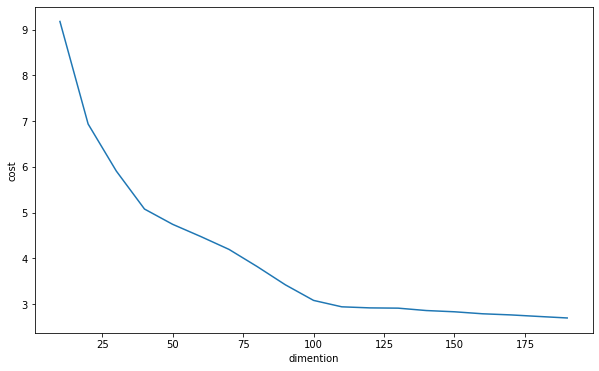

In [64]:
ana_adam.plot_cost_vs_dim()

## line search

In [102]:
paras = {
'x0':1,
'alpha':0.1,
'beta':0.01,
'max_iter':1000,
'tol':1e-1,
'verbose':False,
'record':False
}
ls = line_search()
ls.set_parameters(paras)
stats_adam = test_high_dimension_same_norm(ls, 10)

dim: 10, time: 0.0009477853775024414, cost: 9.26747394916296, evals: 18.4
dim: 20, time: 0.00227658748626709, cost: 7.026299913802286, evals: 36.0
dim: 30, time: 0.0034142017364501955, cost: 5.99502957738469, evals: 48.2
dim: 40, time: 0.0028984785079956056, cost: 5.1799167351298845, evals: 69.0
dim: 50, time: 0.003330087661743164, cost: 4.77049069375101, evals: 83.2
dim: 60, time: 0.004193615913391113, cost: 4.491391654288816, evals: 97.4
dim: 70, time: 0.004664993286132813, cost: 4.205028671610087, evals: 112.4
dim: 80, time: 0.005794501304626465, cost: 3.9839234734591074, evals: 136.0
dim: 90, time: 0.00668342113494873, cost: 3.682382501618637, evals: 159.0
dim: 100, time: 0.007625603675842285, cost: 3.3509556366003688, evals: 171.8
dim: 110, time: 0.00789780616760254, cost: 3.147404571581773, evals: 179.2
dim: 120, time: 0.007540106773376465, cost: 3.024696048350589, evals: 172.4
dim: 130, time: 0.010396790504455567, cost: 2.919541948293406, evals: 193.0
dim: 140, time: 0.009484291

## cma

In [20]:
cma = cma_es()
stats_ad = test_high_dimension_cma(cma)

dim: 1, time: 0.03937792778015137, cost: 1.7296792624854618e-06, evals: 196.0
dim: 11, time: 0.31318020820617676, cost: 2.5791379965500738e-05, evals: 3839.0
dim: 21, time: 0.4485137462615967, cost: 0.0082663504355307, evals: 5200.0
dim: 31, time: 0.5610907077789307, cost: 0.29450176065664424, evals: 5600.0
dim: 41, time: 0.7663192749023438, cost: 2.027314080072085, evals: 6000.0
dim: 51, time: 0.9734439849853516, cost: 3.3053796735329866, evals: 6000.0
dim: 61, time: 1.1368680000305176, cost: 3.1667732428782007, evals: 6400.0
dim: 71, time: 1.464972972869873, cost: 4.5921453186339924, evals: 6400.0
dim: 81, time: 1.8459439277648926, cost: 5.3468395541218285, evals: 6800.0
dim: 91, time: 2.3009791374206543, cost: 6.344076803924189, evals: 6800.0
dim: 101, time: 2.8644068241119385, cost: 7.86297355947519, evals: 6800.0
dim: 111, time: 3.568682909011841, cost: 4.675826227566155, evals: 7200.0
dim: 121, time: 4.2510621547698975, cost: 8.016529886268792, evals: 7200.0
dim: 131, time: 5.622

In [30]:
ana_ad = post_analysis_highD(stats_ad)

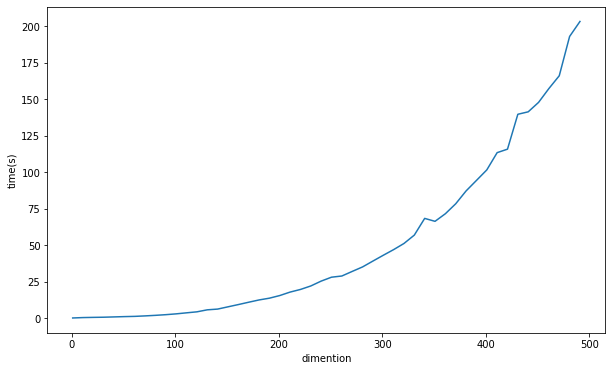

In [23]:
ana_ad.plot_time_vs_dim()

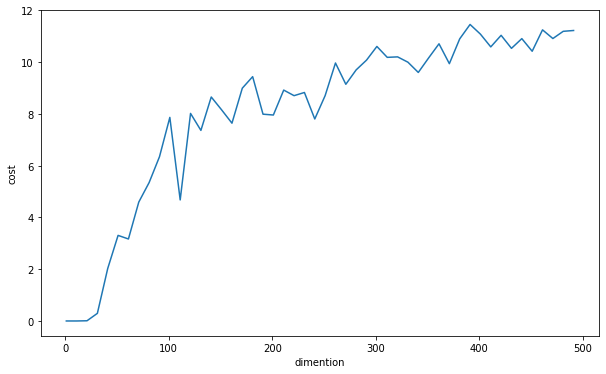

In [24]:
ana_ad.plot_cost_vs_dim()

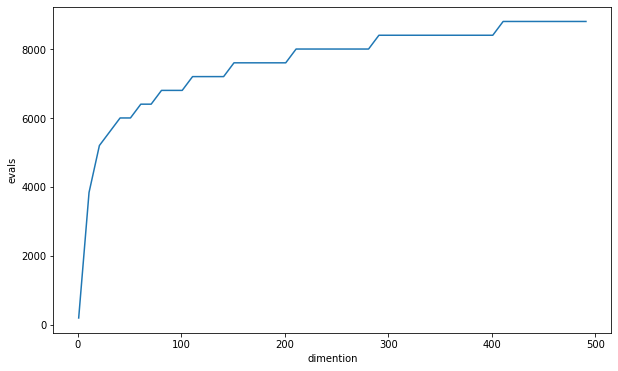

In [25]:
ana_ad.plot_evals_vs_dim()

## keep same distance to origin

In [66]:
cma = cma_es()
stats_ad = test_high_dimension_same_norm(cma, hasSTD=True)

dim: 10, time: 0.323436975479126, cost: 1.4605911669907101e-05, evals: 2730.0
dim: 20, time: 0.41673707962036133, cost: 0.0063628397413606486, evals: 4800.0
dim: 30, time: 0.5044159889221191, cost: 0.07195986121129794, evals: 5600.0


/Users/huajian/Non-convex/library/optimiser.py:150: ComplexWarning:

Casting complex values to real discards the imaginary part



dim: 40, time: 0.7203447818756104, cost: 2.736577333667722, evals: 6000.0
dim: 50, time: 0.9756150245666504, cost: 2.8346655150266007, evals: 6000.0
dim: 60, time: 1.1313211917877197, cost: 3.6154417058041486, evals: 6400.0
dim: 70, time: 1.4176878929138184, cost: 4.588705792908296, evals: 6400.0
dim: 80, time: 1.8218932151794434, cost: 7.213324710411969, evals: 6800.0
dim: 90, time: 2.2480456829071045, cost: 5.610418400608594, evals: 6800.0
dim: 100, time: 3.0678861141204834, cost: 8.392998269434246, evals: 6800.0
dim: 110, time: 3.4371747970581055, cost: 5.630051667690701, evals: 7200.0
dim: 120, time: 4.5306830406188965, cost: 4.890323921214673, evals: 7200.0
dim: 130, time: 5.047497034072876, cost: 6.4879820283131835, evals: 7200.0
dim: 140, time: 6.664510011672974, cost: 5.972760525928674, evals: 7200.0
dim: 150, time: 7.300954818725586, cost: 7.9783804531677305, evals: 7600.0
dim: 160, time: 9.368821859359741, cost: 6.877233255814616, evals: 7600.0
dim: 170, time: 9.7548007965087

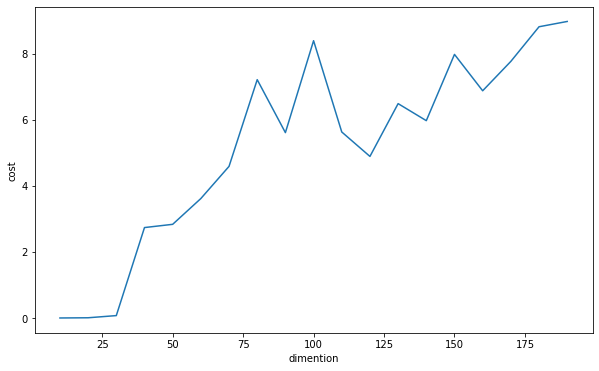

In [67]:
ana_ad = post_analysis_highD(stats_ad)
ana_ad.plot_cost_vs_dim()

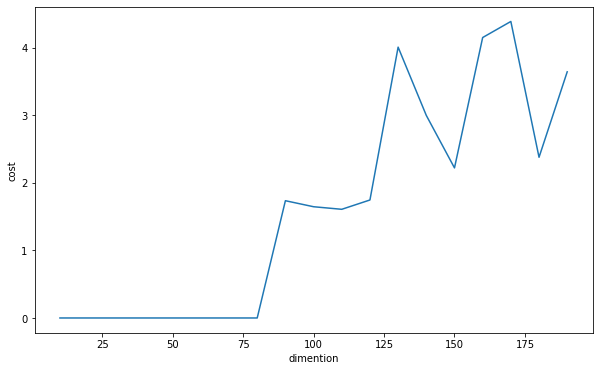

In [71]:
ana_cmals_norm.plot_cost_vs_dim()

## cma-es with line search

In [13]:
cmals = cma_es()
paras = {'x0': None,
         'std': None,
         'tol': 1e-5, 
         'adjust_func': line_search(), 
         'record': False, 
         'verbose': False}
cmals.set_parameters(paras)
stats_ad = test_high_dimension_cma(cmals)

dim: 10, time: 0.5244040489196777, cost: 3.7543980089260742e-06, evals: 14071.0
dim: 20, time: 2.2255289554595947, cost: 2.345069316067594e-06, evals: 58482.0
dim: 30, time: 2.586371898651123, cost: 1.3268257750276291e-06, evals: 65657.0
dim: 40, time: 2.6436731815338135, cost: 9.254172614880929e-07, evals: 65185.0


/Users/huajian/Non-convex/library/optimiser.py:150: ComplexWarning:

Casting complex values to real discards the imaginary part



dim: 50, time: 3.812016010284424, cost: 4.966038358311664e-07, evals: 87408.0
dim: 60, time: 8.83593225479126, cost: 7.761862663713259e-08, evals: 167545.0
dim: 70, time: 6.8741538524627686, cost: 2.7106342503913083e-08, evals: 137231.0
dim: 80, time: 7.105027198791504, cost: 4.124113361925197e-08, evals: 138719.0
dim: 90, time: 9.286360025405884, cost: 1.6914059476816878, evals: 158386.0
dim: 100, time: 10.632538795471191, cost: 3.106554342213741e-06, evals: 170815.0
dim: 110, time: 13.256136178970337, cost: 2.342032554047091, evals: 190548.0
dim: 120, time: 14.589398860931396, cost: 2.1457943499389605, evals: 207904.0
dim: 130, time: 16.137155055999756, cost: 2.1595093794426394, evals: 224910.0
dim: 140, time: 17.040301084518433, cost: 5.077404183443996, evals: 236338.0
dim: 150, time: 21.762746810913086, cost: 2.5126782092057884, evals: 269510.0
dim: 160, time: 24.737876892089844, cost: 4.150156669380085, evals: 283130.0
dim: 170, time: 26.220738887786865, cost: 1.8718940226545375, 

In [31]:
ana_cmals = post_analysis_highD(stats_ad)

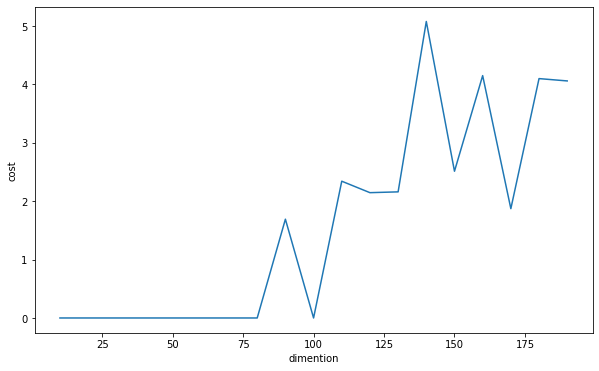

In [24]:
ana_cmals.plot_cost_vs_dim()

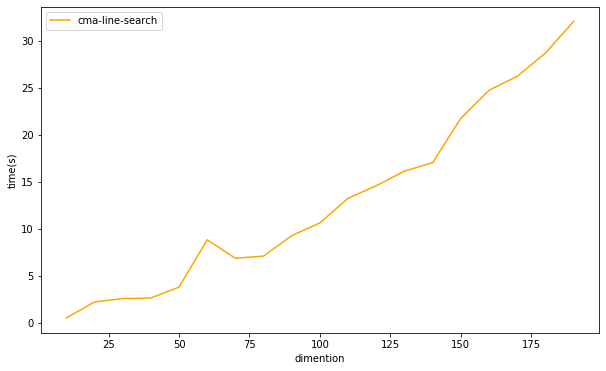

In [32]:
ana_cmals.plot_time_vs_dim()
plt.legend(["cma-line-search"])

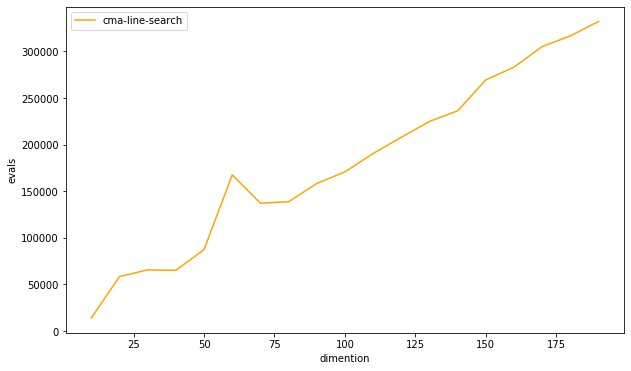

In [33]:
ana_cmals.plot_evals_vs_dim()
plt.legend(["cma-line-search"])

## keep same distance to origin¶

In [69]:
cmals = cma_es()
paras = {'x0': None,
         'std': None,
         'tol': 1e-5, 
         'adjust_func': line_search(), 
         'record': False, 
         'verbose': False}
cmals.set_parameters(paras)
stats_cma = test_high_dimension_same_norm(cmals, hasSTD=True)

dim: 10, time: 0.4442250728607178, cost: 5.7988818191745395e-09, evals: 12482.0
dim: 20, time: 1.6938321590423584, cost: 4.463918049868454e-06, evals: 44299.0
dim: 30, time: 2.419865846633911, cost: 6.589576639903783e-07, evals: 64414.0
dim: 40, time: 3.1008551120758057, cost: 7.649666544651268e-08, evals: 77995.0


/Users/huajian/Non-convex/library/optimiser.py:150: ComplexWarning:

Casting complex values to real discards the imaginary part



dim: 50, time: 3.446808099746704, cost: 1.2599855070405397e-07, evals: 80524.0
dim: 60, time: 5.67086386680603, cost: 4.5498317691183843e-07, evals: 127804.0
dim: 70, time: 7.735393047332764, cost: 5.344809719254329e-07, evals: 158718.0
dim: 80, time: 7.993057012557983, cost: 1.5067221110776075e-06, evals: 156673.0
dim: 90, time: 8.720160961151123, cost: 1.7352980204244841, evals: 158522.0
dim: 100, time: 9.644107818603516, cost: 1.6462238372843108, evals: 167152.0
dim: 110, time: 11.556110858917236, cost: 1.6082210431617914, evals: 193934.0
dim: 120, time: 12.851503849029541, cost: 1.7460808436823645, evals: 208478.0
dim: 130, time: 15.580219745635986, cost: 4.007862757940913, evals: 222832.0
dim: 140, time: 21.17595076560974, cost: 2.9974672042703827, evals: 238908.0
dim: 150, time: 21.000845909118652, cost: 2.220809377295535, evals: 270954.0
dim: 160, time: 23.632620096206665, cost: 4.150100025840487, evals: 284514.0
dim: 170, time: 25.811041831970215, cost: 4.387821348917345, evals

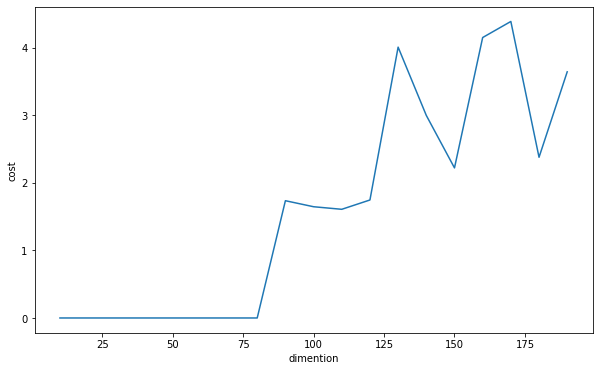

In [70]:
ana_cmals_norm = post_analysis_highD(stats_cma)
ana_cmals_norm.plot_cost_vs_dim()

In [84]:
cmals = cma_es()
paras = {'x0': None,
         'std': None,
         'max_iter':100,
         'tol': 1e-1, 
         'adjust_func': adam(alpha=100), 
         'record': False, 
         'verbose': False}
cmals.set_parameters(paras)
stats_cma = test_high_dimension_same_norm(cmals, hasSTD=True)

dim: 10, time: 2.538734197616577, cost: 0.001057876328307561, evals: 41467.0


KeyboardInterrupt: 

In [73]:
times[:31]

array([ 0.11569095,  0.54694891,  1.77832603,  3.1556952 ,  4.25439715,
        4.7830739 ,  9.72276783,  7.5497489 , 11.78546405, 12.46482205,
       13.78765798, 16.59674883, 18.1686368 , 21.06956172, 22.95768309,
       25.64481497, 28.63089943, 30.39006782, 33.27890825, 35.56559014,
       39.86449409, 44.82366586, 57.56089711, 58.77844214, 54.20078111,
        2.13337684,  0.37070727,  4.29377413, 14.28205085, 24.16168189,
       23.77196813])

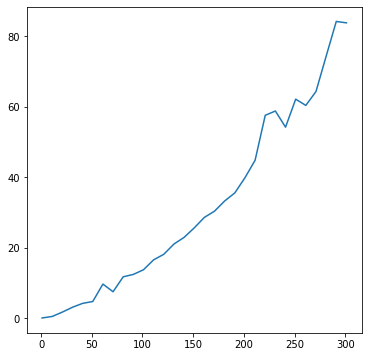

In [78]:
fig = plt.figure(figsize=(6,6))
plt.plot(dims[:31], times[:31])

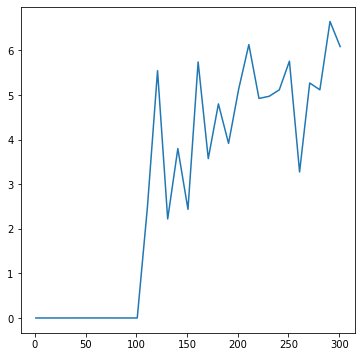

In [79]:
fig = plt.figure(figsize=(6,6))
plt.plot(dims[:31], cost_[:31])